# Import libraries and read in the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [114]:
df = pd.read_csv('../mod_three_project/citibike_2018_2.csv')

__Check out the head of our DataFrame__

In [115]:
df.head()

,tripduration,start station id,usertype,birth year,gender,start_month,start_day_of_week,start_hour,ave_temp,precip,snow_depth,stop_nhbr
0,556,518.0,1,1965,1,1,1,7,19.5,0.00,0,Tribeca
1,689,539.0,1,1988,1,1,0,11,43.5,0.01,0,Park Slope
2,1649,366.0,1,1982,2,1,6,11,46.0,0.00,0,Clinton Hill
3,467,387.0,0,1969,0,1,5,22,45.5,0.00,0,Clinton
4,665,540.0,1,1982,1,1,0,13,43.5,0.01,0,East Village


__Lets see how many rows say they are older than 80.__

In [116]:
df[df['birth year'] <= 1939].shape

(2361, 12)

In [117]:
round(df[df['birth year'] <= 1939].shape[0]/df.shape[0] * 100,2)

0.13

In [118]:
df[df['birth year'] <= 1939]['birth year'].value_counts()

1900    595
1937    239
1939    161
1938    151
1923    139
1935    112
1936     97
1887     84
1888     81
1934     79
1932     79
1933     68
1901     43
1894     37
1912     37
1885     33
1930     30
1924     29
1895     28
1910     26
1886     25
1921     23
1917     23
1899     21
1909     19
1918     17
1931     17
1929     13
1919      8
1916      8
1907      7
1896      6
1889      5
1890      4
1920      3
1915      3
1922      3
1926      2
1927      1
1928      1
1911      1
1913      1
1897      1
1893      1
Name: birth year, dtype: int64

Only __0.13%__ is from people saying they were born before 1939. If you look at the data above, these all seem pretty unrealistic, so lets __drop these values.__

In [119]:
df.drop(list(df[df['birth year'] <= 1939]['birth year'].index),inplace=True)
df.head()

,tripduration,start station id,usertype,birth year,gender,start_month,start_day_of_week,start_hour,ave_temp,precip,snow_depth,stop_nhbr
0,556,518.0,1,1965,1,1,1,7,19.5,0.00,0,Tribeca
1,689,539.0,1,1988,1,1,0,11,43.5,0.01,0,Park Slope
2,1649,366.0,1,1982,2,1,6,11,46.0,0.00,0,Clinton Hill
3,467,387.0,0,1969,0,1,5,22,45.5,0.00,0,Clinton
4,665,540.0,1,1982,1,1,0,13,43.5,0.01,0,East Village


In [120]:
df.shape #the old len == 1754542, so this seems correct

(1752181, 12)

### the youngest riders would need to be born in 2003, so we check for any riders claiming to be born after that

In [153]:
df['birth year'].max()

2002

it looks like there are no riders claiming to be younger, great!


__We realized there were a few missing values, so let's check for them now:__

In [121]:
df.isnull().sum()

tripduration         0
start station id     0
usertype             0
birth year           0
gender               0
start_month          0
start_day_of_week    0
start_hour           0
ave_temp             0
precip               0
snow_depth           0
stop_nhbr            9
dtype: int64

There are __nine__ missing values in the neighborhoods, so lets fill those with the mode of the neighborhoods. There are very few to replace, so this shouldn't skew results.

In [122]:
#df.stop_nhbr.value_counts() -- this returned 'East Village' as the mode
df.stop_nhbr.fillna('East Village',inplace=True)

### We should look at the pair plot of this data to get an idea for what our data looks like

### Dealing with birth year joks
If you look at the birth year there appears to be a big spike in our distribution at __1969__. So, to handle all these jokes what we will try to do is for all the 1969 values we will take the averge age of these stop neighborhoods--without the 69's and replace the 69's with the birth year that corresponds to their neighborhood.

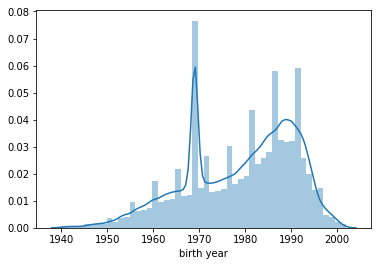

In [44]:
%matplotlib inline
sns.distplot(df['birth year'])

Create a DataFrame with all the median ages of each stop neighborhood, we will then replace the 1969 values for these. 

In [123]:
median_birthyear_no_69 = pd.DataFrame(df[df['birth year'] != 1969 ].groupby('stop_nhbr')['birth year'].median())

In [124]:
median_birthyear_no_69.reset_index(inplace=True) 
median_birthyear_no_69.head()

,stop_nhbr,birth year
0,Astoria,1985
1,Battery Park,1983
2,Bedford Stuyvesant,1983
3,Boerum Hill,1983
4,Brooklyn Heights,1983


In [125]:
def change_birth_year(row,med_age_df):
    '''
    This function will be applied to each row, where ever there is a 1969 we will replace it with the birth year 
    from median_birthyear_no_69 which matches with our stop neighborhood
    '''
    if row['birth year'] == 1969:
        year = med_age_df[med_age_df['stop_nhbr']== row['stop_nhbr']]['birth year']
        return year.item()
    else:
        return row['birth year']

### create a new column with the new birth years

In [126]:
df['update_birth_yr'] = df.apply(lambda row: change_birth_year(row,median_birthyear_no_69),axis=1)

In [138]:
df.head()

,tripduration,start station id,usertype,birth year,gender,start_month,start_day_of_week,start_hour,ave_temp,precip,snow_depth,stop_nhbr,update_birth_yr
0,556,518.0,1,1965,1,1,1,7,19.5,0.00,0,Tribeca,1965
1,689,539.0,1,1988,1,1,0,11,43.5,0.01,0,Park Slope,1988
2,1649,366.0,1,1982,2,1,6,11,46.0,0.00,0,Clinton Hill,1982
3,467,387.0,0,1969,0,1,5,22,45.5,0.00,0,Clinton,1983
4,665,540.0,1,1982,1,1,0,13,43.5,0.01,0,East Village,1982


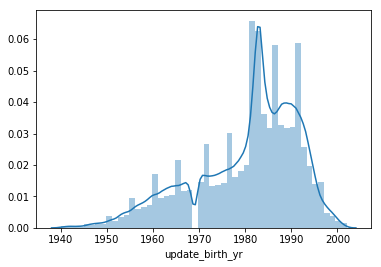

In [139]:
sns.distplot(df.update_birth_yr)

Let's do it now with 1969 still included:

In [140]:
median_birthyear = pd.DataFrame(df.groupby('stop_nhbr')['birth year'].median())
median_birthyear.reset_index(inplace=True) 
median_birthyear.head()

,stop_nhbr,birth year
0,Astoria,1984
1,Battery Park,1981
2,Bedford Stuyvesant,1981
3,Boerum Hill,1981
4,Brooklyn Heights,1982


In [141]:
df['update_birth_yr_2'] = df.apply(lambda row: change_birth_year(row,median_birthyear),axis=1)

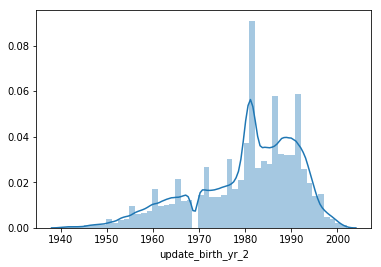

In [142]:
sns.distplot(df.update_birth_yr_2)

In [143]:
k2_1, p_1 = stats.normaltest(df.update_birth_yr)
k2_2, p_2 = stats.normaltest(df.update_birth_yr_2)

In [144]:
print(f'P (no 69): {p_1}',f'P wo 69): {p_2}',sep='\n')

P (no 69): 0.0
P wo 69): 0.0


### Lets drop the tripduration and original birth year columns, they didn't help the models

In [154]:
df.drop(['tripduration','birth year'],axis=1,inplace=True)

Save this new and updated DataFrame before we bin all these ages

In [155]:
df.to_csv('citibike_data_update_b_yr.csv')

In [ ]:
df = pd.read_csv('citibike_data_update_b_yr.csv')

First, we used a list comprehension to create the labels and distances of the cuts. Then, we set the min and max values for our ranges!


In [4]:
min_yr, max_yr = df.update_birth_yr_2.min(),df.update_birth_yr_2.max()
year_ranges = ["{0} - {1}".format(age, age + 7) for age in range(min_yr, max_yr, 8)]
n_year_ranges = len(year_ranges)

Based on our histograms, we are going to use the column __'update_birth_yr_2'__ for this binning process.

In [5]:
df['birth_yr_range'] = pd.cut(x=df['update_birth_yr_2'], bins=n_year_ranges, labels=year_ranges)

In [6]:
df.head()

,Unnamed: 0,start station id,usertype,gender,start_month,start_day_of_week,start_hour,ave_temp,precip,snow_depth,stop_nhbr,update_birth_yr,update_birth_yr_2,birth_yr_range
0,0,518.0,1,1,1,1,7,19.5,0.00,0,Tribeca,1965,1965,1964 - 1971
1,1,539.0,1,1,1,0,11,43.5,0.01,0,Park Slope,1988,1988,1988 - 1995
2,2,366.0,1,2,1,6,11,46.0,0.00,0,Clinton Hill,1982,1982,1980 - 1987
3,3,387.0,0,0,1,5,22,45.5,0.00,0,Clinton,1983,1980,1980 - 1987
4,4,540.0,1,1,1,0,13,43.5,0.01,0,East Village,1982,1982,1980 - 1987


In [8]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

#### Our birth year ranges have now been created, so we drop the unneeded columns and save our new file

In [9]:
df.drop(['update_birth_yr', 'update_birth_yr_2'],axis=1,inplace=True)

In [11]:
df.head()

,start station id,usertype,gender,start_month,start_day_of_week,start_hour,ave_temp,precip,snow_depth,stop_nhbr,birth_yr_range
0,518.0,1,1,1,1,7,19.5,0.00,0,Tribeca,1964 - 1971
1,539.0,1,1,1,0,11,43.5,0.01,0,Park Slope,1988 - 1995
2,366.0,1,2,1,6,11,46.0,0.00,0,Clinton Hill,1980 - 1987
3,387.0,0,0,1,5,22,45.5,0.00,0,Clinton,1980 - 1987
4,540.0,1,1,1,0,13,43.5,0.01,0,East Village,1980 - 1987


In [178]:
df.birth_yr_range.value_counts()

1980 - 1987    569274
1988 - 1995    500865
1972 - 1979    221066
1964 - 1971    183004
1956 - 1963    135523
1996 - 2003     89505
1948 - 1955     43872
1940 - 1947      9072
Name: birth_yr_range, dtype: int64

In [12]:
df.to_csv('citibike_data_update.csv')

Lets bin the data by the times of day people are leaving: __from midnight to 12pm, from 12pm to midnight.__

In [14]:
df.start_hour.min()

0

In [29]:
min_hr, max_hr = df.start_hour.min(),df.start_hour.max()
hr_ranges = ["{0} - {1}".format(age, age + 11) for age in range(min_hr, max_hr, 12)]
n_hr_ranges = len(hr_ranges)

In [30]:
df['start_hr_range'] = pd.cut(x=df.start_hour, bins=n_hr_ranges, labels=hr_ranges)

In [32]:
df.to_csv('new_2018_citibike_data.cvs')